In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC  # Import SVM classifier
from sklearn.neighbors import KNeighborsClassifier #import KNN classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier #import Random Forest classifier
from sklearn.naive_bayes import GaussianNB #import Naive bayes classifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report # for confusion matrix and accuracy measures
import numpy as np # linear algebra
import pandas as pd
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
data = pd.read_csv("C:/Users/USER/Desktop/sem5/da/project/Accidents_categorical.csv")
data.shape

(251832, 33)

In [ ]:
def preprop(data, to_drop=[], na_thresh = 0.25):
    log = []
    for i in to_drop:                           # Explicitly drop specified columns (intuition and logical reasoning) 
        data = data.drop(i, axis=1)
        log.append("Dropped column " + i + " as requested")

    report = getStats(data)
    # print(report)
    replace_index = {}
    for i in report:
        # print(i)
        if i == "uncertain":            # report has a class of uncertain columns; Do nothing to them
            continue
        
        # If numerical column and less than threshold percentage is empty, fill it with mean of column
        if report[i]["type"] == 'num' and report[i]["na"] > 0 and report[i]["na"] < na_thresh :
            data[i] = data[i].fillna(data[i].mean())
            log.append(i + " : replaced Nan/Na with mean")
            
        #If in any column, more than threshold percentage is empty, drop such columns
        elif (report[i]["type"] == 'num' or report[i]["type"] == 'cat') and report[i]["na"] >= na_thresh :
            # print(data.columns)
            data = data.drop(i, axis=1)
            log.append("Dropped column " + i + " as Nan/Na ratio (" + str(report[i]["na"]) + ") > " + str(na_thresh))
            
            
        # If column is categorical, encode them with numerical classes    
        if report[i]["type"] == 'cat' and i in data.columns:
            replace_index[i] = getEncodings(data[i])
            log.append("Encoded column " + i)

    data = data.replace(replace_index)


    return data, log, replace_index # Returning cleaned data, log of changes made and categorical encodings dict (if any)



def getEncodings(o):
    o = list(set(o))
    o = sorted(o)
    enc = {cls: ind for ind, cls in enumerate(o)}
    return enc


def getStats(data):
    cols = data.columns
    report = {}
    report['uncertain'] = []
    for i in cols:
        report[i] = {}
        report[i]["na"] = data[i].isna().sum() / len(data)
        if "unique" in str(data[i].describe()):
            if len(data[i].unique()) <  0.25 * len(data):
                report[i]["type"] = "cat"
                report[i]["uniq"] = data[i].unique()
                report[i]["uniq_no"] = len(data[i].unique())
            else:
                report["uncertain"].append(i)
        else:
            report[i]["type"] = "num"
    return report


# Accident_Index and Datetime provide no useful information
prepro_data, logs, encs = preprop(data, to_drop=["Accident_Index", "Datetime"])  
#print("\n".join(logs))

In [3]:
cols = list(prepro_data.columns)
feature_cols=[]
for i in range(0,len(cols)-1):
    feature_cols.append(cols[i])
#print(feature_cols)
X = prepro_data[feature_cols] # Features
y = prepro_data.Accident_Severity # Target variable

In [4]:
pca = PCA(28)
pca.fit(X)
pca.n_components_
print(pca.explained_variance_ratio_)

[9.98763932e-01 5.77517315e-04 2.18533223e-04 1.49725631e-04
 5.83370558e-05 3.93741107e-05 3.32678245e-05 3.03532947e-05
 2.62481128e-05 2.20421994e-05 1.22225867e-05 1.19321019e-05
 1.12054696e-05 1.05220965e-05 8.61542428e-06 5.62904204e-06
 3.78193997e-06 3.39708288e-06 3.02298642e-06 2.90201562e-06
 2.26325416e-06 1.69056774e-06 1.37613915e-06 1.20355755e-06
 3.97594386e-07 3.28706632e-07 1.09579708e-07 6.92440947e-08]


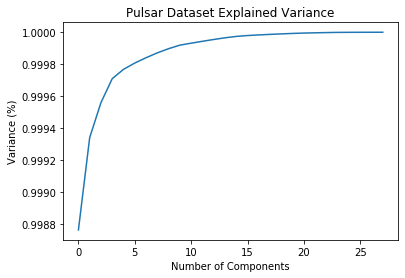

In [5]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [6]:
pca = PCA(n_components=15)
dataset = pca.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.3, random_state=1) # 70% training and 30% test

Accuracy: 64.41826604897419
              precision    recall  f1-score   support

           0       0.32      0.30      0.31     20000
           1       0.75      0.77      0.76     55550

    accuracy                           0.64     75550
   macro avg       0.54      0.53      0.53     75550
weighted avg       0.64      0.64      0.64     75550



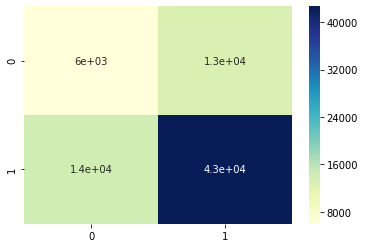

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))

In [ ]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, svm_predictions)*100)

cm = confusion_matrix(y_test, svm_predictions) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))

Accuracy: 72.78093977498345
              precision    recall  f1-score   support

           0       0.36      0.34      0.35     20322
           1       0.76      0.78      0.77     55228

    accuracy                           0.66     75550
   macro avg       0.56      0.56      0.56     75550
weighted avg       0.66      0.66      0.66     75550



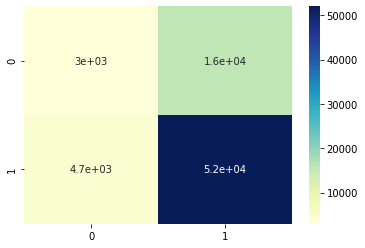

In [19]:
# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print("Accuracy:",accuracy*100) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))

Accuracy: 75.63732627399074
              precision    recall  f1-score   support

           0       0.09      0.58      0.15      2768
           1       0.98      0.76      0.86     72782

    accuracy                           0.76     75550
   macro avg       0.53      0.67      0.50     75550
weighted avg       0.95      0.76      0.83     75550



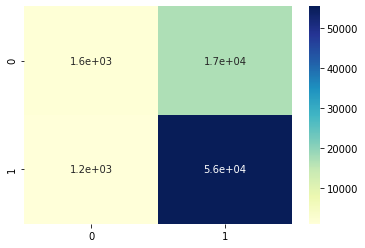

In [8]:
#training Random Forest model

clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))

Accuracy: 75.00595632031767
              precision    recall  f1-score   support

           0       0.05      0.49      0.10      2061
           1       0.98      0.76      0.85     73489

    accuracy                           0.75     75550
   macro avg       0.52      0.63      0.48     75550
weighted avg       0.96      0.75      0.83     75550



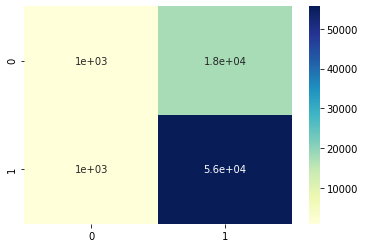

In [9]:
#training Naive Bayes model

model = GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))